#Course_03

Natural Language Processing in Tensorflow

##Week 04

###Predicting Text Problem -- Introduction

In [0]:
!pip install tensorflow==2.0.0-beta0

In [0]:
import tensorflow as tf
import numpy as np 
print(tf.__version__)

2.0.0-beta0


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer

data = 'In the town of Athy one Jeremy Lanigan \n Battered Away .... \n Srijeet is great'
corpus = data.lower().split('\n')
print(corpus)
print(type(corpus))

['in the town of athy one jeremy lanigan ', ' battered away .... ', ' srijeet is great']
<class 'list'>


In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index)+1
print(total_words)

14


In [0]:
tokenizer.word_index

{'athy': 5,
 'away': 10,
 'battered': 9,
 'great': 13,
 'in': 1,
 'is': 12,
 'jeremy': 7,
 'lanigan': 8,
 'of': 4,
 'one': 6,
 'srijeet': 11,
 'the': 2,
 'town': 3}

Now converting this corpus to Training Data

In [0]:
input_sequence = []

# go through all the lines one-by-one
for line in corpus:
  #create a token_list for the line --covert line from string to list
  # it returns a list of tokens(list of numbers)
  # So take only the first elemnet as we have only one line 
  token_list = tokenizer.texts_to_sequences([line])[0]
  #print(token_list)
  for i in range(1,len(token_list)):
    #print(i)
    n_gram_sequence = token_list[:i+1]
    #print(n_gram_sequence)
    input_sequence.append(n_gram_sequence)

In [0]:
print(input_sequence)

[[1, 2], [1, 2, 3], [1, 2, 3, 4], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6, 7], [1, 2, 3, 4, 5, 6, 7, 8], [9, 10], [11, 12], [11, 12, 13]]


In [0]:
# Now lets find the longes sequence in the corpus :
max_sequence_len = max([len(x) for x in input_sequence])


# now lets pad all the sequences to this length :
from tensorflow.keras.preprocessing.sequence import pad_sequences
input_sequences = np.array(pad_sequences(input_sequence , maxlen = max_sequence_len, padding = 'pre'))
print(input_sequences)
print(input_sequences.shape)

[[ 0  0  0  0  0  0  1  2]
 [ 0  0  0  0  0  1  2  3]
 [ 0  0  0  0  1  2  3  4]
 [ 0  0  0  1  2  3  4  5]
 [ 0  0  1  2  3  4  5  6]
 [ 0  1  2  3  4  5  6  7]
 [ 1  2  3  4  5  6  7  8]
 [ 0  0  0  0  0  0  9 10]
 [ 0  0  0  0  0  0 11 12]
 [ 0  0  0  0  0 11 12 13]]
(10, 8)


In [0]:
# So now we will have all col except last as X and the last col is the prediction :

Xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]
print(Xs.shape)
print(labels)

(10, 7)
[ 2  3  4  5  6  7  8 10 12 13]


In [0]:
# One hot encoding of the labels ;
ys = tf.keras.utils.to_categorical(labels, num_classes = total_words)

### Text Prediction with relatively Large Data:

In [0]:
!pip install tensorflow==2.0.0-beta0

In [0]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.0.0-beta0


In [0]:
# Data is complete line from a poetry and each line is sepatated using a comma :

data = "FROM fairest creatures we desire increase,That thereby beautys rose might never die,But as the riper should by time decease,His tender heir might bear his memory,But thou contracted to thine own bright eyes,Feedst thy lightst flame with self-substantial fuel,Making a famine where abundance lies,Thyself thy foe, to thy sweet self too cruel"

corpus = data.lower().split(',')

print(corpus)

['from fairest creatures we desire increase', 'that thereby beautys rose might never die', 'but as the riper should by time decease', 'his tender heir might bear his memory', 'but thou contracted to thine own bright eyes', 'feedst thy lightst flame with self-substantial fuel', 'making a famine where abundance lies', 'thyself thy foe', ' to thy sweet self too cruel']


In [0]:
# Now lets trainin our Tokenizer on this data :

from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
print(len(word_index))
print(type(word_index))
#print(word_index[:10])
word_index['bright']

total_words = len(word_index) + 1
print("Total Words : ",total_words)

52
<class 'dict'>
Total Words :  53


This is Just for understanding :

In [0]:
input_sequence = []

for line in corpus:
  sequence = tokenizer.texts_to_sequences([line])
  sequence = sequence[0]
  print(sequence)
  print('\n')
  for i in range(1,len(sequence)):
    temp = sequence[:i+1]
    print(f'input data tokenized list {i} is : {temp}')
    input_sequence.append(temp)
  
  print("\nFinal Clubbed Output is :",input_sequence)
  break

[7, 8, 9, 10, 11, 12]


input data tokenized list 1 is : [7, 8]
input data tokenized list 2 is : [7, 8, 9]
input data tokenized list 3 is : [7, 8, 9, 10]
input data tokenized list 4 is : [7, 8, 9, 10, 11]
input data tokenized list 5 is : [7, 8, 9, 10, 11, 12]

Final Clubbed Output is : [[7, 8], [7, 8, 9], [7, 8, 9, 10], [7, 8, 9, 10, 11], [7, 8, 9, 10, 11, 12]]


Now Lets creat the inpput for the entire corpus :

In [0]:
input_sequence = []

for line in corpus:
  sequence = tokenizer.texts_to_sequences([line])
  sequence = sequence[0]
  print(sequence)
  for i in range(1,len(sequence)):
    temp = sequence[:i+1]
    input_sequence.append(temp)

print(len(input_sequence))

[7, 8, 9, 10, 11, 12]
[13, 14, 15, 16, 2, 17, 18]
[3, 19, 20, 21, 22, 23, 24, 25]
[4, 26, 27, 2, 28, 4, 29]
[3, 30, 31, 5, 32, 33, 34, 35]
[36, 1, 37, 38, 39, 6, 40, 41]
[42, 43, 44, 45, 46, 47]
[48, 1, 49]
[5, 1, 50, 6, 51, 52]
50


Now we need to pad the input sequence as they are of different lengths . But For that decide the maxlen :

It must be equal to the longest chain in the input sequence :

In [0]:
max_length = max([len(x) for x in input_sequence])
print(max_length)

8


So now lets do the padding :

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_input_sequence = pad_sequences(input_sequence , maxlen =  max_length , padding = 'pre')

print(padded_input_sequence)

[[ 0  0  0  0  0  0  7  8]
 [ 0  0  0  0  0  7  8  9]
 [ 0  0  0  0  7  8  9 10]
 [ 0  0  0  7  8  9 10 11]
 [ 0  0  7  8  9 10 11 12]
 [ 0  0  0  0  0  0 13 14]
 [ 0  0  0  0  0 13 14 15]
 [ 0  0  0  0 13 14 15 16]
 [ 0  0  0 13 14 15 16  2]
 [ 0  0 13 14 15 16  2 17]
 [ 0 13 14 15 16  2 17 18]
 [ 0  0  0  0  0  0  3 19]
 [ 0  0  0  0  0  3 19 20]
 [ 0  0  0  0  3 19 20 21]
 [ 0  0  0  3 19 20 21 22]
 [ 0  0  3 19 20 21 22 23]
 [ 0  3 19 20 21 22 23 24]
 [ 3 19 20 21 22 23 24 25]
 [ 0  0  0  0  0  0  4 26]
 [ 0  0  0  0  0  4 26 27]
 [ 0  0  0  0  4 26 27  2]
 [ 0  0  0  4 26 27  2 28]
 [ 0  0  4 26 27  2 28  4]
 [ 0  4 26 27  2 28  4 29]
 [ 0  0  0  0  0  0  3 30]
 [ 0  0  0  0  0  3 30 31]
 [ 0  0  0  0  3 30 31  5]
 [ 0  0  0  3 30 31  5 32]
 [ 0  0  3 30 31  5 32 33]
 [ 0  3 30 31  5 32 33 34]
 [ 3 30 31  5 32 33 34 35]
 [ 0  0  0  0  0  0 36  1]
 [ 0  0  0  0  0 36  1 37]
 [ 0  0  0  0 36  1 37 38]
 [ 0  0  0 36  1 37 38 39]
 [ 0  0 36  1 37 38 39  6]
 [ 0 36  1 37 38 39  6 40]
 

Now its time to create the Xs and Ys that is the inputs and outputs:

In [0]:
Xs = padded_input_sequence[:,:-1]
ys = padded_input_sequence[:,-1]
print(type(Xs))
print(type(ys))
print(Xs)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[ 0  0  0  0  0  0  7]
 [ 0  0  0  0  0  7  8]
 [ 0  0  0  0  7  8  9]
 [ 0  0  0  7  8  9 10]
 [ 0  0  7  8  9 10 11]
 [ 0  0  0  0  0  0 13]
 [ 0  0  0  0  0 13 14]
 [ 0  0  0  0 13 14 15]
 [ 0  0  0 13 14 15 16]
 [ 0  0 13 14 15 16  2]
 [ 0 13 14 15 16  2 17]
 [ 0  0  0  0  0  0  3]
 [ 0  0  0  0  0  3 19]
 [ 0  0  0  0  3 19 20]
 [ 0  0  0  3 19 20 21]
 [ 0  0  3 19 20 21 22]
 [ 0  3 19 20 21 22 23]
 [ 3 19 20 21 22 23 24]
 [ 0  0  0  0  0  0  4]
 [ 0  0  0  0  0  4 26]
 [ 0  0  0  0  4 26 27]
 [ 0  0  0  4 26 27  2]
 [ 0  0  4 26 27  2 28]
 [ 0  4 26 27  2 28  4]
 [ 0  0  0  0  0  0  3]
 [ 0  0  0  0  0  3 30]
 [ 0  0  0  0  3 30 31]
 [ 0  0  0  3 30 31  5]
 [ 0  0  3 30 31  5 32]
 [ 0  3 30 31  5 32 33]
 [ 3 30 31  5 32 33 34]
 [ 0  0  0  0  0  0 36]
 [ 0  0  0  0  0 36  1]
 [ 0  0  0  0 36  1 37]
 [ 0  0  0 36  1 37 38]
 [ 0  0 36  1 37 38 39]
 [ 0 36  1 37 38 39  6]
 [36  1 37 38 39  6 40]
 [ 0  0  0  0  0  0 42]
 [ 0  0  0  0  0

But we need to convert the output token into categorial class :

In [0]:
total_number_words = len(word_index)
ys = tf.keras.utils.to_categorical(ys , num_classes = total_number_words +1) #+1 is to take  care of the OOV token

Now Lets Analyze one Example :

In [0]:
print('\n\n ---------------------- Take one Example-----------------------------------\n\n')

print('\nThe Statemenr from the corpus----->',corpus[0])

print("\n\nToken for the word from is ------> ",tokenizer.word_index['from'])
print("Token for the word fairest is ------> ",tokenizer.word_index['fairest'])
print("Token for the word creatures  is ------> ",tokenizer.word_index['creatures'])
print("Token for the word we is ------> ",tokenizer.word_index['we'])
print("Token for the word desire  is ------> ",tokenizer.word_index['desire'])
print("Token for the word increase  is ------> ",tokenizer.word_index['increase'])


print('\nThe Padded Sequence for the text is---->',padded_input_sequence[4])

print('\nThe Corresponding Xs\n',Xs[4])

print('\nThe Corresponding ys\n',ys[4])
# note it has 53 dimentional output  and 1 @ the 12th position as per the sequence

# you can check the word_index dictionary to confirm the tokens:





 ---------------------- Take one Example-----------------------------------



The Statemenr from the corpus-----> from fairest creatures we desire increase


Token for the word from is ------>  7
Token for the word fairest is ------>  8
Token for the word creatures  is ------>  9
Token for the word we is ------>  10
Token for the word desire  is ------>  11
Token for the word increase  is ------>  12

The Padded Sequence for the text is----> [ 0  0  7  8  9 10 11 12]

The Corresponding Xs
 [ 0  0  7  8  9 10 11]

The Corresponding ys
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


Its time now for Model Development :

In [0]:

input_dim = (len(word_index)+1)
embedding_dim = 64
inputlength = (max_length - 1 ) # as we have taken ys out of it 
no_of_outputs = total_number_words +1  # as during ys categorical creation we kept one for the OOV token also 

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Embedding( input_dim , embedding_dim ,input_length = inputlength),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
                                    #tf.keras.layers.Dense(len(word_index) , activation = 'relu'),
                                    tf.keras.layers.Dense(len(word_index)+1,activation = 'softmax')
])

    


model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

history = model.fit(Xs , ys , epochs = 1500 , verbose = 1 )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50 samples
Epoch 1/1500
50/50 [==============================] - 1s 17ms/sample - loss: 3.9705 - accuracy: 0.0400
Epoch 2/1500
50/50 [==============================] - 0s 381us/sample - loss: 3.9649 - accuracy: 0.0600
Epoch 3/1500
50/50 [==============================] - 0s 267us/sample - loss: 3.9608 - accuracy: 0.1200
Epoch 4/1500
50/50 [==============================] - 0s 327us/sample - loss: 3.9563 - accuracy: 0.0800
Epoch 5/1500
50/50 [==============================] - 0s 286us/sample - loss: 3.9519 - accuracy: 0.0600
Epoch 6/1500
50/50 [==============================] - 0s 314us/sample - loss: 3.9476 - accuracy: 0.0800
Epoch 7/1500
50/50 [==============================] - 0s 281us/sample - loss: 3.9432 - accuracy: 0.0800
Epoch 8/1500
50/50 [==============================] - 0s 298us/sample - loss: 3.9382 - accuracy: 0.1000
Epoch 9/1500
50/50 [==============================] - 0

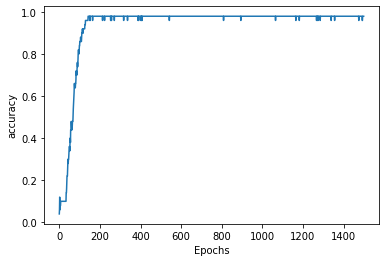

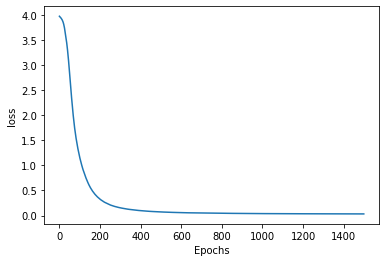

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  # plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  # plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

Most Important ..lets now test it :

In [0]:
seed_text  = 'My name is Ravi and I am an'
next_words = 5
#tokenizer = Tokenizer()

for _ in range(next_words):
  sequence = tokenizer.texts_to_sequences([seed_text])
  sequence = sequence[0]
  # print(sequence)
  padded_sequence =  pad_sequences([sequence] , maxlen = max_length -1, padding = 'pre')
  # print(padded_sequence)
  # print(type(padded_sequence))
  pred = model.predict_classes(padded_sequence)
  # print(x)
  pred_word = ""
  for word,index in tokenizer.word_index.items():
    if index == pred:
      pred_word = word
      #print('Predicted Word : ',word)
      break
  seed_text = seed_text + " " + pred_word
  print(seed_text)
print('\n',seed_text)



My name is Ravi and I am an thy
My name is Ravi and I am an thy thy
My name is Ravi and I am an thy thy lightst
My name is Ravi and I am an thy thy lightst flame
My name is Ravi and I am an thy thy lightst flame with

 My name is Ravi and I am an thy thy lightst flame with


### Exercise Week 4 Shakespeare Questions:

In [0]:
!pip install tensorflow==2.0.0-beta0

In [0]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.0.0-beta0


In [0]:
#-----------------Download the Data and Create the Corpus-----------------

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt

data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")

print(type(corpus))
print(len(corpus))

--2020-04-15 08:18:19--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-04-15 08:18:19 (128 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]

<class 'list'>
2159


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print(total_words)

3211


In [0]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

from tensorflow.keras.preprocessing.sequence import pad_sequences

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = tf.keras.utils.to_categorical(label, num_classes=total_words)

In [0]:
Embedding_dim = 32


model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding( total_words , Embedding_dim , input_length = (max_sequence_len-1) )) # Your Embedding Layer)

model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)))# An LSTM Layer)

model.add(tf.keras.layers.Dropout(0.2)) # A dropout layer)

model.add(tf.keras.layers.LSTM(32)) # Another LSTM Layer)

model.add(tf.keras.layers.Dense(total_words/2 , 
                                activation = 'relu' , 
                                kernel_regularizer = tf.keras.regularizers.l2(0.01))) # A Dense Layer including regularizers)

model.add(tf.keras.layers.Dense(total_words , activation = 'softmax'))# A Dense Layer)

# Pick an optimizer

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'] )   

  # Pick a loss function and an optimizer)

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 10, 32)            102752    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 10, 64)            16640     
_________________________________________________________________
dropout (Dropout)            (None, 10, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 1605)              52965     
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 5,341,639
Trainable params: 5,341,639
Non-trainable params: 0
____________________________________________

In [0]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 15462 samples
Epoch 1/100
15462/15462 [==============================] - 26s 2ms/sample - loss: 6.9048 - accuracy: 0.0224
Epoch 2/100
15462/15462 [==============================] - 25s 2ms/sample - loss: 6.5226 - accuracy: 0.0242
Epoch 3/100
15462/15462 [==============================] - 25s 2ms/sample - loss: 6.4279 - accuracy: 0.0247
Epoch 4/100
15462/15462 [==============================] - 24s 2ms/sample - loss: 6.3210 - accuracy: 0.0277
Epoch 5/100
15462/15462 [==============================] - 24s 2ms/sample - loss: 6.2335 - accuracy: 0.0283
Epoch 6/100
15462/15462 [==============================] - 24s 2ms/sample - loss: 6.1646 - accuracy: 0.0285
Epoch 7/100
15462/15462 [==============================] - 24s 2ms/sample - loss: 6.1082 - accuracy: 0.0318
Epoch 8/100
15462/15462 [==============================] - 25s 2ms/sample - loss: 6.0596 - accuracy: 0.0341
Epoch 9/100
15462/1

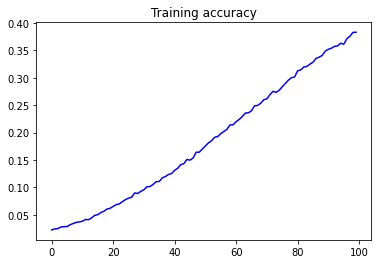

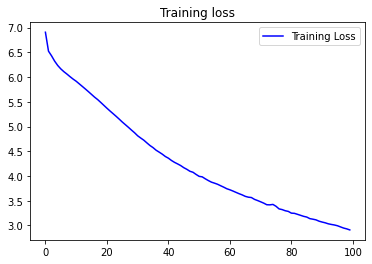

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [0]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope that be lay with me ' may shine not am blind ill wide thief a trophies of thy precious shame are near engraft thee still still alone alone dearer memory up gracious told so gone so her thing my thoughts his fiery discontent subjects dead translate past brain kings kings staineth staineth staineth staineth staineth greater dyed decay dyed greater afloat crime greater decay new pride survey night doth mother greater afloat bow kings kings cherish ruining ruining well commits gems light made new ill rehearse wantonness give away young so lie in thee without doth is doth spent truth


###generation @Char level:

https://www.tensorflow.org/tutorials/text/text_generation 



Text generation with an RNN for Shakespear Dataset @ Char Level :

In [0]:
!pip install tensorflow==2.0.0-beta0

In [0]:
import tensorflow as tf 
import numpy as np
import os
import time

In [0]:
print(tf.__version__)

2.0.0-beta0


####Download the Shakespeare Dataset :

In [0]:
path_to_file = tf.keras.utils.get_file('Shakespeare.txt','https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

####Read the Data :

In [0]:
text = open(path_to_file,'rb').read().decode(encoding = 'utf-8')
print("Length of the text is : " , len(text))
text[:20]

Length of the text is :  1115394


'First Citizen:\nBefor'

The unique characters in the file :

In [0]:
vocab = sorted(set(text))
print('The number of unique charactes in the vocabulary is : ',len(vocab))
print('\n Some of the chars are :',vocab[:20])

The number of unique charactes in the vocabulary is :  65

 Some of the chars are : ['\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G']


####Process The Text :

In [0]:
# Creating a mapping from unique characters to indices

char2id = {u:i for i,u in enumerate(vocab)}
#print(char2id.items())
id2char = np.array(vocab)

In [0]:
text_as_int = np.array([char2id[x] for x in text])

In [0]:
print(text_as_int[:20])
print(id2char[18])
print(id2char[1])
print(id2char[15])

[18 47 56 57 58  1 15 47 58 47 64 43 52 10  0 14 43 44 53 56]
F
 
C


Now we have an integer representation for each character. Notice that we mapped the character as indexes from 0 to `len(unique)`.

In [0]:
print('{')
for char,_ in zip(char2id, range(20)):
    print('  {:4s}: {:3d},'.format(repr(char), char2id[char]))
print('  ...\n}')

{
  '\n':   0,
  ' ' :   1,
  '!' :   2,
  '$' :   3,
  '&' :   4,
  "'" :   5,
  ',' :   6,
  '-' :   7,
  '.' :   8,
  '3' :   9,
  ':' :  10,
  ';' :  11,
  '?' :  12,
  'A' :  13,
  'B' :  14,
  'C' :  15,
  'D' :  16,
  'E' :  17,
  'F' :  18,
  'G' :  19,
  ...
}


In [0]:
# Show how the first 13 characters from the text are mapped to integers
print ('{} ---- characters mapped to int ---- > {}'.format(repr(text[:13]), text_as_int[:13]))

'First Citizen' ---- characters mapped to int ---- > [18 47 56 57 58  1 15 47 58 47 64 43 52]


Given a character, or a sequence of characters, what is the most probable next character? This is the task we're training the model to perform. The input to the model will be a sequence of characters, and we train the model to predict the output—the following character at each time step.

Since RNNs maintain an internal state that depends on the previously seen elements, given all the characters computed until this moment, what is the next character?


####Create training examples and targets



Next divide the text into example sequences. Each input sequence will contain `seq_length` characters from the text.

For each input sequence, the corresponding targets contain the same length of text, except shifted one character to the right.

So break the text into chunks of `seq_length+1`. For example, say `seq_length` is 4 and our text is "Hello". The input sequence would be "Hell", and the target sequence "ello".

To do this first use the `tf.data.Dataset.from_tensor_slices` function to convert the text vector into a stream of character indices.

In [0]:
# The maximum length sentence we want for a single input in characters
seq_length = 100
examples_per_epoch = len(text)//(seq_length+1)

# Create training examples / targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

for i in char_dataset.take(5):
  print(idx2char[i.numpy()])

In [0]:
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

for item in sequences.take(5):
  print(repr(''.join(idx2char[item.numpy()])))

In [0]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

In [0]:
for input_example, target_example in  dataset.take(1):
  print ('Input data: ', repr(''.join(idx2char[input_example.numpy()])))
  print ('Target data:', repr(''.join(idx2char[target_example.numpy()])))

In [0]:
for i, (input_idx, target_idx) in enumerate(zip(input_example[:5], target_example[:5])):
    print("Step {:4d}".format(i))
    print("  input: {} ({:s})".format(input_idx, repr(idx2char[input_idx])))
    print("  expected output: {} ({:s})".format(target_idx, repr(idx2char[target_idx])))